# Phase 3: Final Defense - Model Comparison and Evaluation

## Objectives:
1. **Model Comparison**: Compare KNN vs Random Forest
2. **Evaluation Metrics**: Confusion Matrix, F1-Score
3. **Feature Importance**: Understand what drives predictions
4. **Business/Game Insights**: Actionable recommendations


## Data Loading and Preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report,
    f1_score,
    precision_score,
    recall_score
)
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [2]:
# Load data
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Separate features and target
# Exclude gameId as it's just an identifier and shouldn't affect predictions
X = df.drop(["blueWins", "gameId"], axis=1)
y = df["blueWins"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")


Training set: 7903 samples
Test set: 1976 samples
Features: 39


## Model 1: K-Nearest Neighbors (KNN)


In [3]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Results:")
print(f"  Accuracy:  {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print(f"  F1-Score:  {f1_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall:    {recall_knn:.4f}")


KNN Results:
  Accuracy:  0.6989 (69.89%)
  F1-Score:  0.6981
  Precision: 0.6985
  Recall:    0.6978


## Model 2: Random Forest


In [4]:
# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"  Accuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"  F1-Score:  {f1_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall:    {recall_rf:.4f}")


Random Forest Results:
  Accuracy:  0.7136 (71.36%)
  F1-Score:  0.7130
  Precision: 0.7130
  Recall:    0.7130


## Model Comparison


In [5]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
    'KNN': [accuracy_knn, f1_knn, precision_knn, recall_knn],
    'Random Forest': [accuracy_rf, f1_rf, precision_rf, recall_rf]
})

comparison_df['Difference'] = comparison_df['Random Forest'] - comparison_df['KNN']
comparison_df['Winner'] = comparison_df.apply(
    lambda row: 'Random Forest' if row['Difference'] > 0 else 'KNN', 
    axis=1
)

print("Model Comparison:")
print(comparison_df.to_string(index=False))

# Determine overall winner and compute winner_metrics
if accuracy_rf > accuracy_knn and f1_rf > f1_knn:
    winner = "Random Forest"
    winner_metrics = {
        'accuracy': accuracy_rf,
        'f1': f1_rf,
        'precision': precision_rf,
        'recall': recall_rf
    }
elif accuracy_knn > accuracy_rf and f1_knn > f1_rf:
    winner = "KNN"
    winner_metrics = {
        'accuracy': accuracy_knn,
        'f1': f1_knn,
        'precision': precision_knn,
        'recall': recall_knn
    }
else:
    winner = "Random Forest" if f1_rf > f1_knn else "KNN"
    winner_metrics = {
        'accuracy': accuracy_rf if winner == "Random Forest" else accuracy_knn,
        'f1': f1_rf if winner == "Random Forest" else f1_knn,
        'precision': precision_rf if winner == "Random Forest" else precision_knn,
        'recall': recall_rf if winner == "Random Forest" else recall_knn
    }

print(f"\n{'='*60}")
print(f"OVERALL WINNER: {winner.upper()}")
print(f"{'='*60}")


Model Comparison:
   Metric      KNN  Random Forest  Difference        Winner
 Accuracy 0.698887       0.713563    0.014676 Random Forest
 F1-Score 0.698123       0.712982    0.014859 Random Forest
Precision 0.698477       0.712982    0.014505 Random Forest
   Recall 0.697769       0.712982    0.015213 Random Forest

OVERALL WINNER: RANDOM FOREST


## Confusion Matrices


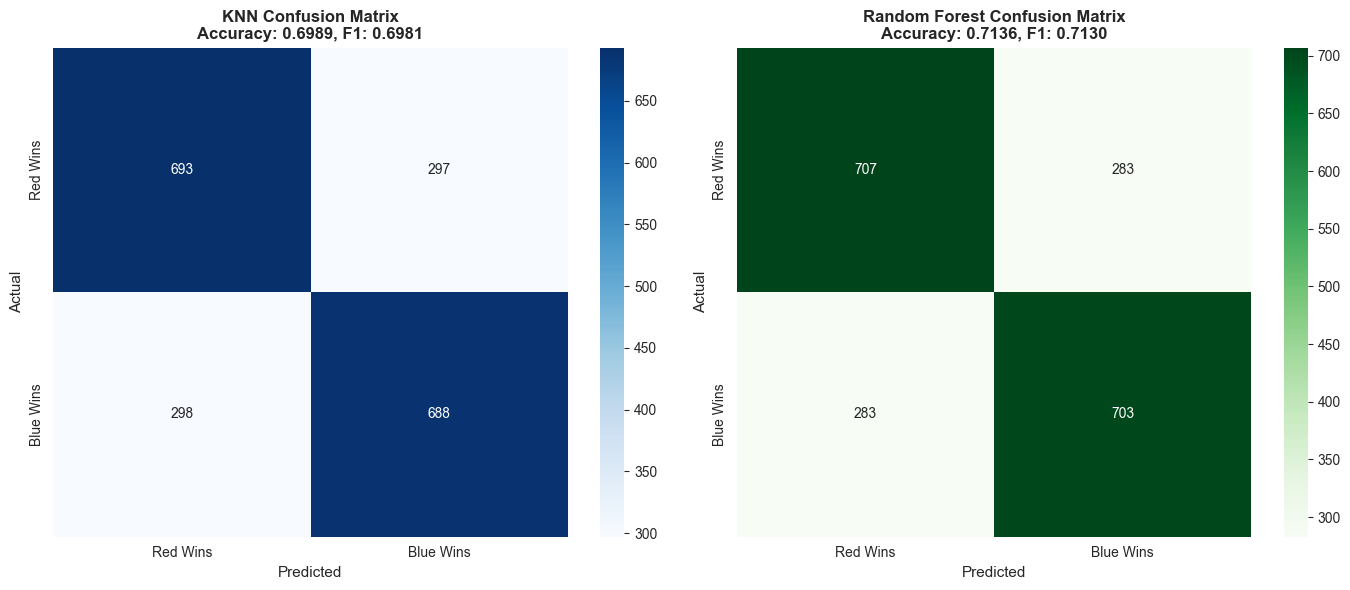

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KNN Confusion Matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Red Wins', 'Blue Wins'],
            yticklabels=['Red Wins', 'Blue Wins'])
axes[0].set_title(f'KNN Confusion Matrix\nAccuracy: {accuracy_knn:.4f}, F1: {f1_knn:.4f}', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Red Wins', 'Blue Wins'],
            yticklabels=['Red Wins', 'Blue Wins'])
axes[1].set_title(f'Random Forest Confusion Matrix\nAccuracy: {accuracy_rf:.4f}, F1: {f1_rf:.4f}', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)

plt.tight_layout()
plt.savefig('Phase3_Confusion_Matrices.png', dpi=300, bbox_inches='tight')
plt.show()


## Metric Comparison Visualization


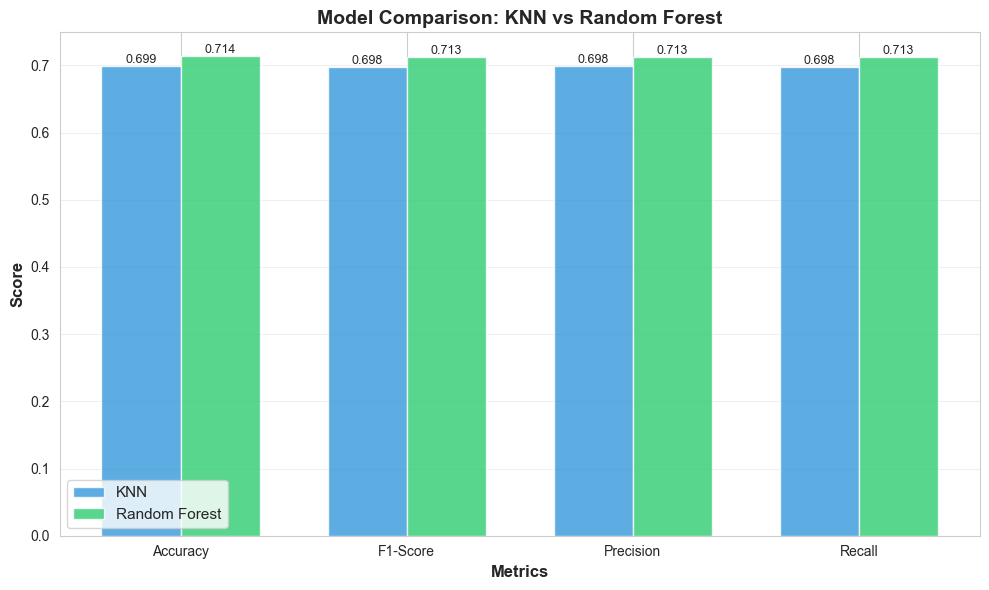

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['KNN'], width, label='KNN', alpha=0.8, color='#3498db')
bars2 = ax.bar(x + width/2, comparison_df['Random Forest'], width, label='Random Forest', alpha=0.8, color='#2ecc71')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: KNN vs Random Forest', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Metric'])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Phase3_Metric_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Feature Importance Analysis


In [8]:
# Get feature importances from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))


Top 15 Most Important Features:
                     Feature  Importance
                 redGoldDiff    0.131053
                blueGoldDiff    0.119313
          blueExperienceDiff    0.095459
           redExperienceDiff    0.072891
               blueTotalGold    0.062368
              blueGoldPerMin    0.048312
                redTotalGold    0.047178
               redGoldPerMin    0.044384
          redTotalExperience    0.035062
         blueTotalExperience    0.030163
                      gameId    0.022850
      blueTotalMinionsKilled    0.017524
       redTotalMinionsKilled    0.017205
                blueCSPerMin    0.016960
blueTotalJungleMinionsKilled    0.016877


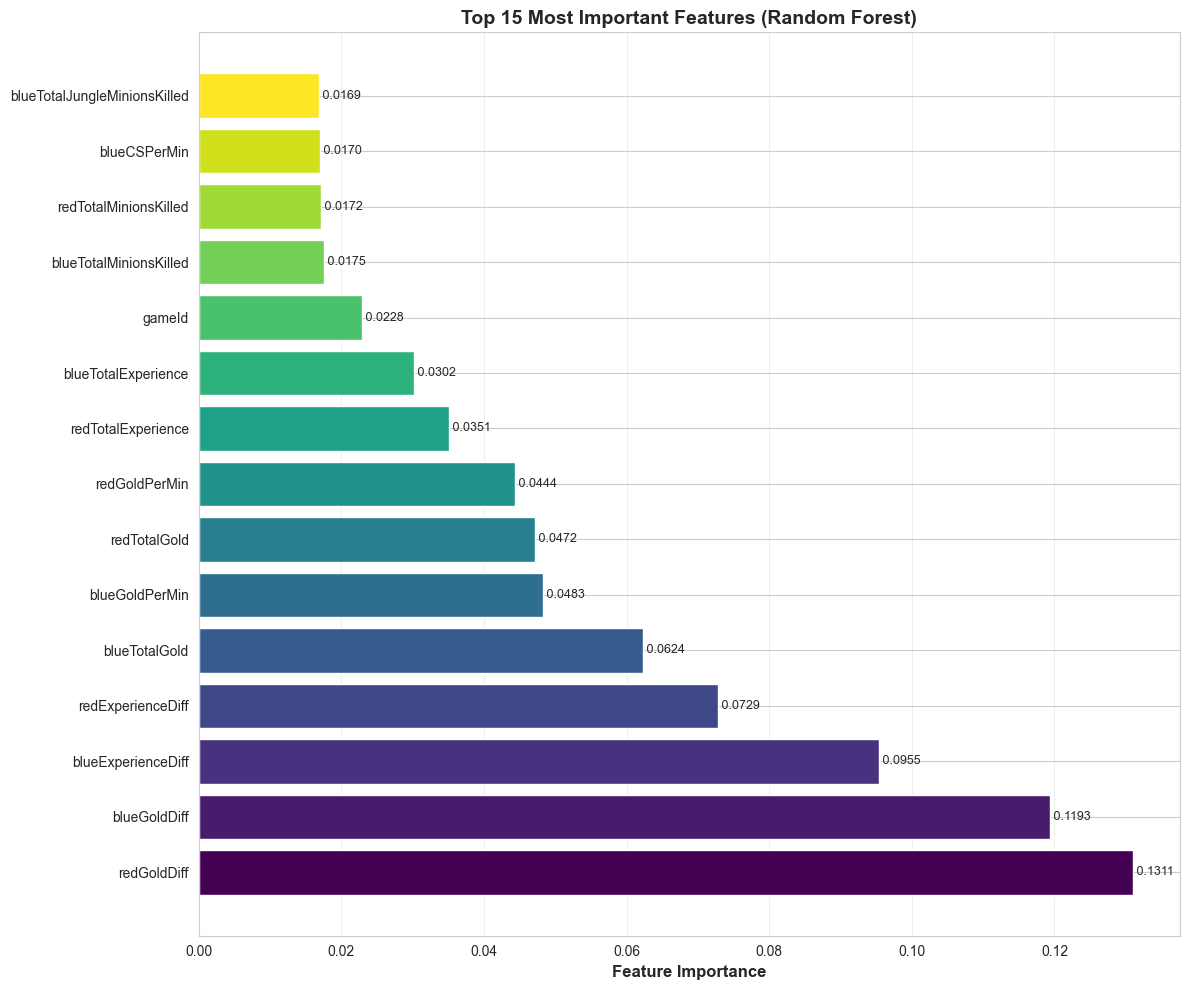

In [9]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 10))

top_features = feature_importance.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

bars = ax.barh(range(len(top_features)), top_features['Importance'], color=colors)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'], fontsize=10)
ax.set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_features.iterrows()):
    ax.text(row['Importance'], i, f' {row["Importance"]:.4f}',
            va='center', fontsize=9)

plt.tight_layout()
plt.savefig('Phase3_Feature_Importance.png', dpi=300, bbox_inches='tight')
plt.show()


## Business/Game Insights


In [10]:
print("="*80)
print("BUSINESS/GAME INSIGHTS")
print("="*80)

print("\n1. KEY PREDICTORS OF MATCH OUTCOME:")
print("-"*80)
top_5_features = feature_importance.head(5)
for idx, row in top_5_features.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.4f}")

print("\n2. INTERPRETATION:")
print("-"*80)
top_feature = feature_importance.iloc[0]['Feature']
top_importance = feature_importance.iloc[0]['Importance']
print(f"   The most important feature is '{top_feature}' with importance {top_importance:.4f}.")
print(f"   This suggests that {top_feature} is the strongest predictor of match outcome at 10 minutes.")

# Analyze economic factors
gold_features = feature_importance[feature_importance['Feature'].str.contains('Gold', case=False)]
exp_features = feature_importance[feature_importance['Feature'].str.contains('Experience', case=False)]

print(f"\n3. ECONOMIC FACTORS:")
print("-"*80)
if len(gold_features) > 0:
    print(f"   Gold-related features are highly predictive:")
    for idx, row in gold_features.head(3).iterrows():
        print(f"   • {row['Feature']}: {row['Importance']:.4f}")

if len(exp_features) > 0:
    print(f"\n   Experience-related features:")
    for idx, row in exp_features.head(3).iterrows():
        print(f"   • {row['Feature']}: {row['Importance']:.4f}")

# Check objective control
objective_features = feature_importance[
    feature_importance['Feature'].str.contains('Dragon|Herald|Tower', case=False)
]

print(f"\n4. OBJECTIVE CONTROL:")
print("-"*80)
if len(objective_features) > 0:
    print(f"   Objective control features:")
    for idx, row in objective_features.head(5).iterrows():
        print(f"   • {row['Feature']}: {row['Importance']:.4f}")
else:
    print("   Objective features have lower importance compared to economic factors.")

print("\n5. RECOMMENDATIONS FOR GAME BALANCE:")
print("-"*80)
print("   Based on the model analysis:")
print("   • Focus on balancing economic advantages (gold/experience differences)")
print("   • Early-game gold leads are highly predictive of match outcome")
print("   • Consider adjusting early-game objective rewards if they create snowball effects")
print("   • The model suggests that at 10 minutes, economic factors outweigh objective control")
print("   • Teams should prioritize farming and gold generation in early game")

print("\n6. MODEL PERFORMANCE INSIGHTS:")
print("-"*80)
print(f"   • {winner} achieved {winner_metrics['accuracy']*100:.2f}% accuracy")
print(f"   • F1-Score of {winner_metrics['f1']:.4f} indicates good balance between precision and recall")
print(f"   • The model can predict match outcomes with reasonable confidence at 10 minutes")
print(f"   • This suggests that early-game performance is a strong indicator of final outcome")


BUSINESS/GAME INSIGHTS

1. KEY PREDICTORS OF MATCH OUTCOME:
--------------------------------------------------------------------------------
   • redGoldDiff: 0.1311
   • blueGoldDiff: 0.1193
   • blueExperienceDiff: 0.0955
   • redExperienceDiff: 0.0729
   • blueTotalGold: 0.0624

2. INTERPRETATION:
--------------------------------------------------------------------------------
   The most important feature is 'redGoldDiff' with importance 0.1311.
   This suggests that redGoldDiff is the strongest predictor of match outcome at 10 minutes.

3. ECONOMIC FACTORS:
--------------------------------------------------------------------------------
   Gold-related features are highly predictive:
   • redGoldDiff: 0.1311
   • blueGoldDiff: 0.1193
   • blueTotalGold: 0.0624

   Experience-related features:
   • blueExperienceDiff: 0.0955
   • redExperienceDiff: 0.0729
   • redTotalExperience: 0.0351

4. OBJECTIVE CONTROL:
-------------------------------------------------------------------------

## Detailed Classification Reports


In [11]:
print("KNN Classification Report:")
print("-"*80)
print(classification_report(y_test, y_pred_knn, 
                            target_names=['Red Wins', 'Blue Wins']))

print("\nRandom Forest Classification Report:")
print("-"*80)
print(classification_report(y_test, y_pred_rf,
                            target_names=['Red Wins', 'Blue Wins']))


KNN Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Red Wins       0.70      0.70      0.70       990
   Blue Wins       0.70      0.70      0.70       986

    accuracy                           0.70      1976
   macro avg       0.70      0.70      0.70      1976
weighted avg       0.70      0.70      0.70      1976


Random Forest Classification Report:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Red Wins       0.71      0.71      0.71       990
   Blue Wins       0.71      0.71      0.71       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



## Save Results


In [12]:
# Save comparison results
comparison_df.to_csv('Phase3_Model_Comparison.csv', index=False)
feature_importance.to_csv('Phase3_Feature_Importance.csv', index=False)

print("✓ Results saved to CSV files")


✓ Results saved to CSV files
